# PROJECT AKHIR KECERDASAN BUATAN
# Klasifikasi Jenis Sampah
#### Kelompok 7 (A1-21)
#### Nama Anggota :
#### Rezky Nur Sya'ban         (2109106009)
#### Andi Nur Fadilah          (2109106015)
#### Adlina Safa Sephia Putri  (2109106021)

# Mengimport Library yang Dibutuhkan

In [3]:
import splitfolders
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Collecting

## Data Split
##### Memisahkan dataset ke dalam beberapa folder: train, test, dan val dengan porsi 70 : 10 : 20

In [4]:
# splitfolders.ratio("Garbage classification/Garbage classification/", output = "Klasifikasi Sampah", seed = 1337, ratio = (.7, .1, .2), group_prefix = None)

## Memuat Dataset

### A. Train

In [6]:
dataset_train = image_dataset_from_directory(
    'Klasifikasi Sampah/train/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (80, 80),
    shuffle = True, 
    seed = 47,
)

NotFoundError: Could not find directory Klasifikasi Sampah/train/

### B. Validation

In [ ]:
dataset_val = image_dataset_from_directory(
    'Klasifikasi Sampah/val/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (80, 80),
    shuffle = True, 
    seed = 47,
)

### C. Test

In [ ]:
dataset_test = image_dataset_from_directory(
    'Klasifikasi Sampah/test/',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (80, 80),
    shuffle = True, 
    seed = 47,
)

NameError: name 'image_dataset_from_directory' is not defined

# Data Preprocessing

## Pratinjau Gambar Dataset

In [5]:
import matplotlib.pyplot as plt
class_names = dataset_train.class_names

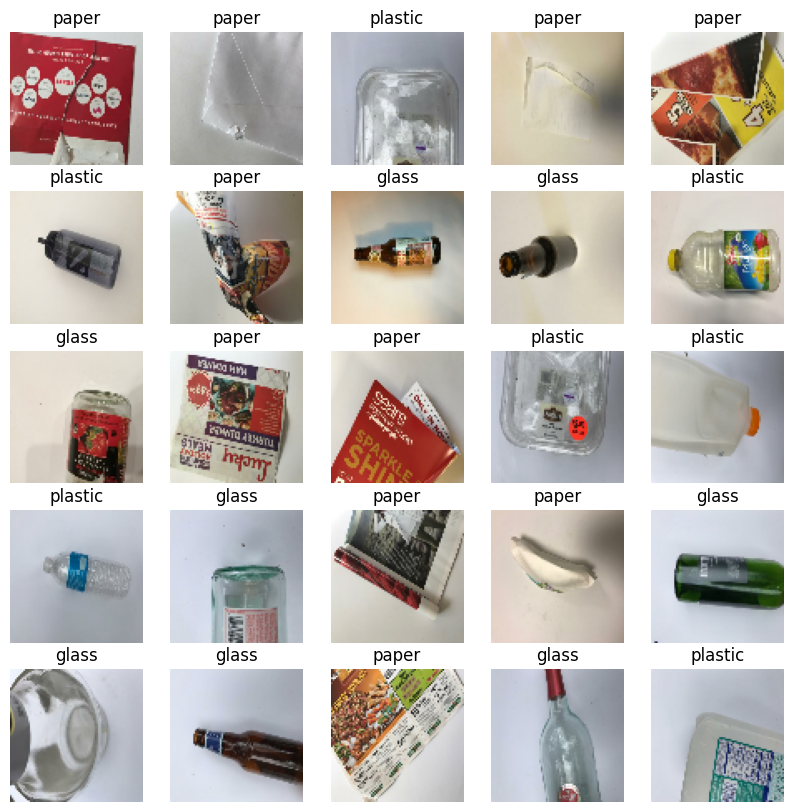

In [6]:
plt.figure(figsize = (10, 10))
for images, labels in dataset_train.take(1):
    for i in range (25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## Augmented Gambar/Resize/Grayscale

In [7]:
def augment(x, y):
    image = tf.image.random_brightness(x, max_delta = 0.5)
    return image, y

In [8]:
dataset_train = dataset_train.map(augment)

# Modelling

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input((80, 80, 3)), 
    
    # Hidden Layer
    layers.Conv2D(16, 3),
    layers.Conv2D(32, 3),
    layers.MaxPool2D(),
    layers.Flatten(),
    
    # Output Layer
    layers.Dense(3),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dense (Dense)               (None, 3)                 138627    
                                                                 
Total params: 143,715
Trainable params: 143,715
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"]
)

In [1]:
model.fit(dataset_train, epochs = 10, verbose = 1) 

NameError: name 'model' is not defined

In [ ]:
# hayyyyyy
